In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import numpy(arrays), matplotlib.pylot(visualization), and pandas(matrices)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

getting dataset from my drive, like last hw divide dataset to 2 vectors for independent vs dependent

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/hw4/50_Startups_multi.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

using matplot in order to graph independnt variables against profit

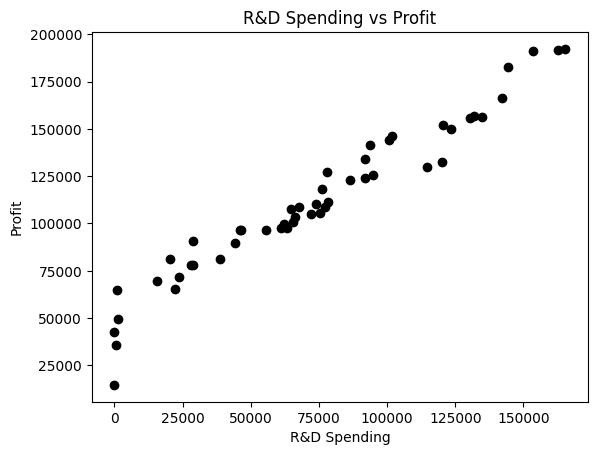

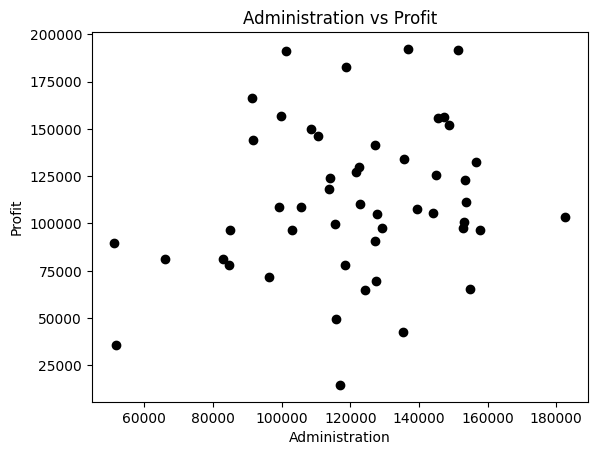

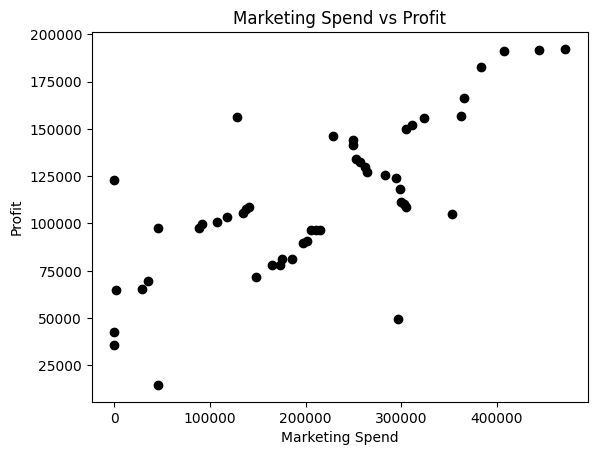

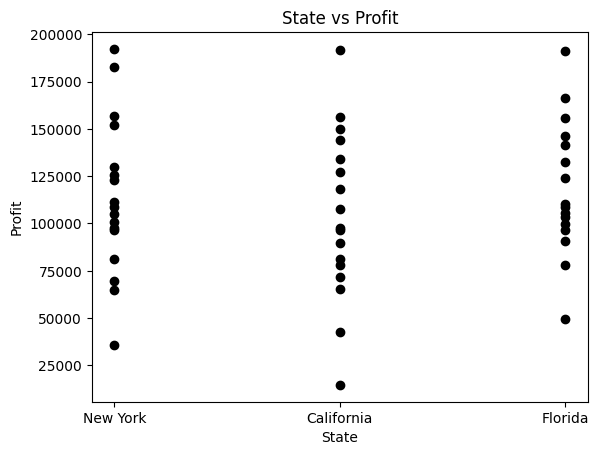

In [ ]:
rAd = np.array(dataset["R&D Spend"])
adm = np.array(dataset["Administration"])
mkt = np.array(dataset["Marketing Spend"])
stt = np.array(dataset["State"])
pft = np.array(dataset["Profit"])

plt.scatter(rAd, pft, color = 'black')
plt.title('R&D Spending vs Profit')
plt.xlabel('R&D Spending')
plt.ylabel('Profit')
plt.show()

plt.scatter(adm, pft, color = 'black')
plt.title('Administration vs Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

plt.scatter(mkt, pft, color = 'black')
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

plt.scatter(stt, pft, color = 'black')
plt.title('State vs Profit')
plt.xlabel('State')
plt.ylabel('Profit')
plt.show()


In [ ]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

using the OrdinalEncoder for the categorial data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
ct = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[2.0 165349.2 136897.8 471784.1]
 [0.0 162597.7 151377.59 443898.53]
 [1.0 153441.51 101145.55 407934.54]
 [2.0 144372.41 118671.85 383199.62]
 [1.0 142107.34 91391.77 366168.42]
 [2.0 131876.9 99814.71 362861.36]
 [0.0 134615.46 147198.87 127716.82]
 [1.0 130298.13 145530.06 323876.68]
 [2.0 120542.52 148718.95 311613.29]
 [0.0 123334.88 108679.17 304981.62]
 [1.0 101913.08 110594.11 229160.95]
 [0.0 100671.96 91790.61 249744.55]
 [1.0 93863.75 127320.38 249839.44]
 [0.0 91992.39 135495.07 252664.93]
 [1.0 119943.24 156547.42 256512.92]
 [2.0 114523.61 122616.84 261776.23]
 [0.0 78013.11 121597.55 264346.06]
 [2.0 94657.16 145077.58 282574.31]
 [1.0 91749.16 114175.79 294919.57]
 [2.0 86419.7 153514.11 0.0]
 [0.0 76253.86 113867.3 298664.47]
 [2.0 78389.47 153773.43 299737.29]
 [1.0 73994.56 122782.75 303319.26]
 [1.0 67532.53 105751.03 304768.73]
 [2.0 77044.01 99281.34 140574.81]
 [0.0 64664.71 139553.16 137962.62]
 [1.0 75328.87 144135.98 134050.07]
 [2.0 72107.6 127864.55 353183.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 3)

multi linear is the simpler version of linear but just has more independent varibales like the example above, so we use the X_train and y_train to make our model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

we'll use the x_tesst in order to predict and save it on y_pred. then we set the precsion to 4 so we can get values of X_test and y_ped to th 4th decimal then we print our results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=4)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[128431.3481 141585.52  ]
 [ 85922.7402  81005.76  ]
 [157372.7946 149759.96  ]
 [ 42727.0347  42559.73  ]
 [ 94101.4262  97483.56  ]
 [ 94760.4257 103282.38  ]
 [125848.9419 134307.35  ]
 [ 54571.9162  35673.41  ]
 [ 44942.4129  64926.08  ]
 [158994.5374 156122.51  ]
 [ 71566.6292  90708.19  ]
 [109601.265  108733.99  ]
 [ 95411.1588  89949.14  ]
 [129133.3146 124266.9   ]
 [176765.9165 166187.94  ]
 [ 99976.3466 107404.34  ]
 [115921.0388 126992.93  ]]
